# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron
- Input Layer
- Hidden Layer
- Output Layer
- Activation
- Backpropagation

 YOUR ANSWER HERE
 
 **Neurons** in my understanding are just weights. each input is dot-producted with the weight to get one number. then an acvitvation function is applied to that number to adjust its signal before it is passed to the next layer.
 
**Input layer** is the first layer in NN.

**Hidden layer** is any layer that is not the input or output layer. it can be any size greater than or equal to one.

**Output layer** is the last layer in the NN. for regressors and classifiers it will be one node. for multiclass classification, usually the number of nodes is equal to the number of classes and softmax is the activation.

**Activation** this can refer to the function that is performed on the multiplcation for each node in the layer. The acivation is often sigmoidal(which compresses the number to a value between 0 and 1) or Rectified linear unit(max of 0 or the value passed to it).

**Backpropagation** is the backward propagation of errors. At this point the more i try to learn the less i understand. Backprop differentiates the Cost function across the all layers of the NN.

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [49]:
##### Your Code Here #####
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1- sigmoid(x))


def generate_perceptron_weights(x,y,weights):
    lr= 0.01
    b = np.ones((x.shape[0],1))
    x = np.concatenate( (x,b  ), axis=1)
    dot = np.matmul(x, weights)
    activated_output = sigmoid(dot)
    error = (y - activated_output.reshape(-1,order='C'))*lr
    adjustment = error * sigmoid_derivative(activated_output).reshape(-1,order='C')
    weight_change = np.dot(x.T, adjustment)
    weights = weights.reshape(-1,order='C') + weight_change
    return weights 
def perceptimus_prime(x,y, num_iterations=1000):
    weights = np.random.random( ([x.shape[1]+1,1]) )
    for i in range(2000):
        weights = generate_perceptron_weights(x,y,weights)
    bias = weights[-1:]
    weights = weights[:-1]
    return weights, bias

def predictor(weights,bias, x_features):
    result = np.dot(weights,x_features)+ bias[0]
    return sigmoid(result)

In [50]:
x= np.array([[1,1,1],[1,0,1],[0,1,1],[0,0,1]])
y= np.array([1,0,0,0])
new_weights, bias = perceptimus_prime(x,y,10000)

x_test = np.array([1,1,1])
    
predictor(new_weights,bias, x_test)

0.5403130319006496

## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [4]:
##### Your Code Here #####
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv")

In [5]:
df.shape

(303, 14)

In [6]:
from sklearn.preprocessing import RobustScaler
df[["age","trestbps","chol","thalach","oldpeak"]] = RobustScaler().fit_transform(
    df[["age","trestbps","chol","thalach","oldpeak"]])

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,0,0,1,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,0,0,2,1
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,2,0,2,1
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,2,0,2,1
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,2,0,2,1


In [8]:
X =df.drop(columns=["target"],axis=1)
y = df["target"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size =.15)

In [75]:
# class Neural_Network(object):
#   def __init__(self):
#     self.inputs = 257
#     self.hiddenNodes = 13
#     self.outputNodes = 1

#     # Initlize Weights
#     self.Layer1_weights = np.random.randn(self.inputs, self.hiddenNodes) # (13x13)
#     self.Layer2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) # (13x1)

#   def feed_forward(self, X):
#     self.activated_hidden = self.sigmoid(np.dot(X, self.Layer1_weights))
#     self.output_sum = np.dot(self.activated_hidden, self.Layer2_weights) 
#     self.activated_output = self.sigmoid(self.output_sum)
#     return self.activated_output.reshape(-1,order='C')
    
#   def sigmoid(self, s):
#     return 1/(1+np.exp(-s))
  
#   def sigmoidPrime(self, s):
#     return s * (1 - s)
  
#   def backward(self, X, y, o):
#     # backward propgate through the network
#     self.o_error = np.asarray(y) - o # error in output
#     self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

#     self.z2_error = self.o_delta.dot(self.Layer2_weights.T) # z2 error: how much our hidden layer weights contributed to output error
#     self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden) # applying derivative of sigmoid to z2 error

#     self.Layer1_weights += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
#     self.Layer2_weights += self.activated_hidden.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
    
#   def train (self, X, y):
#     o = self.feed_forward(X)
#     self.backward(X, y, o)

In [76]:
 self.Layer1_weights = np.random.randn(self.inputs, self.hiddenNodes) # (13x13)
#     self.Layer2_weights = np.random.randn(self.hiddenNodes, self.outputNodes)

numpy.ndarray

In [88]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

layer1_weights = np.random.randn(X_train.shape[1])

def layer1(x):
      return sigmoid(np.dot(x,layer1_weights.T))

In [90]:
layer1(X_train)

(257,)

ValueError: shapes (257,13) and (257,13) not aligned: 13 (dim 1) != 257 (dim 0)

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [10]:
##### Your Code Here #####
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

C:\Users\cwcol\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
model =Sequential()
model.add(Dense(13, input_shape=(13,), activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [12]:
blackbox = model.fit(X_train,y_train, epochs =10, validation_split=.15)

Train on 218 samples, validate on 39 samples
Epoch 1/10
218/218 [==============================] - 2s 7ms/step - loss: 0.7584 - acc: 0.4358 - val_loss: 0.7694 - val_acc: 0.3590
Epoch 2/10
218/218 [==============================] - 0s 78us/step - loss: 0.7327 - acc: 0.4541 - val_loss: 0.7564 - val_acc: 0.3333
Epoch 3/10
218/218 [==============================] - 0s 91us/step - loss: 0.7362 - acc: 0.4817 - val_loss: 0.7441 - val_acc: 0.4359
Epoch 4/10
218/218 [==============================] - 0s 92us/step - loss: 0.7169 - acc: 0.5688 - val_loss: 0.7321 - val_acc: 0.4872
Epoch 5/10
218/218 [==============================] - 0s 82us/step - loss: 0.7073 - acc: 0.5367 - val_loss: 0.7222 - val_acc: 0.5128
Epoch 6/10
218/218 [==============================] - 0s 91us/step - loss: 0.6849 - acc: 0.5780 - val_loss: 0.7119 - val_acc: 0.5128
Epoch 7/10
218/218 [==============================] - 0s 87us/step - loss: 0.6896 - acc: 0.5963 - val_loss: 0.7013 - val_acc: 0.5128
Epoch 8/10
218/218 [=====

In [30]:
import skopt
from skopt import gbrt_minimize, gp_minimize
from skopt.utils import use_named_args
from skopt.space import Real, Categorical, Integer

In [24]:
dim_learning_rate = Real(low=1e-6, high=1e-2, prior='log-uniform',
                         name='learning_rate')
dim_num_dense_layers = Integer(low=1, high=5, name='num_dense_layers')
dim_num_dense_nodes = Integer(low=1, high=28, name='num_dense_nodes')
dim_activation = Categorical(categories=['relu', 'sigmoid'],
                             name='activation')
dim_batch_size = Integer(low=1, high=44, name='batch_size')
dim_adam_decay = Real(low=1e-6,high=1e-2,name="adam_decay")

dimensions = [dim_learning_rate,
              dim_num_dense_layers,
              dim_num_dense_nodes,
              dim_activation,
              dim_batch_size,
              dim_adam_decay
             ]
default_parameters = [1e-3, 1, 13, 'relu',44, 1e-3]

In [25]:
input_shape=X_train.shape[1]

In [26]:
from keras.optimizers import Adam
def create_model(learning_rate, num_dense_layers,num_dense_nodes, activation, adam_decay):
    
    model = Sequential()
    model.add(Dense(num_dense_nodes, activation=activation, input_shape= (input_shape,)
                   ))
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i+1)
        model.add(Dense(num_dense_nodes,
                 activation=activation,
                        name=name
                 ))
    model.add(Dense(1, activation='sigmoid'))
    
    adam = Adam(lr=learning_rate, decay= adam_decay)
    model.compile(optimizer=adam, loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [27]:
import tensorflow
from tensorflow.python.keras import backend as K
@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_dense_layers,num_dense_nodes,activation, batch_size,adam_decay):

    model = create_model(learning_rate=learning_rate,
                         num_dense_layers=num_dense_layers,
                         num_dense_nodes=num_dense_nodes,
                         activation=activation,adam_decay=adam_decay
                        )
    

   
    blackbox = model.fit(x=X_train,
                        y=y_train,
                        epochs=3,
                        batch_size=batch_size,
                        validation_split=0.15,
                        )
    # Get the classification accuracy on the validation-set
    # after the last training-epoch.
    accuracy = blackbox.history['val_acc'][-1]

    # Print the classification accuracy.
    print()
    print("Accuracy: {0:.2%}".format(accuracy))
    print()


    # Delete the Keras model with these hyper-parameters from memory.
    del model
    
    # Clear the Keras session, otherwise it will keep adding new
    # models to the same TensorFlow graph each time we create
    # a model with a different set of hyper-parameters.
    K.clear_session()
    tensorflow.reset_default_graph()
    
    return -accuracy


In [28]:
K.clear_session()
tensorflow.reset_default_graph()

In [46]:
gbrt_result = gbrt_minimize(func=fitness,
                            dimensions=dimensions,
                            acq_func='EI', # Expected Improvement.
                            n_calls=40,
                            n_jobs=-1,
                            x0=default_parameters)

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 764us/step - loss: 0.1350 - acc: 0.9541 - val_loss: 0.5489 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 59us/step - loss: 0.1350 - acc: 0.9541 - val_loss: 0.5488 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 69us/step - loss: 0.1349 - acc: 0.9541 - val_loss: 0.5486 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 705us/step - loss: 0.1348 - acc: 0.9541 - val_loss: 0.5484 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 91us/step - loss: 0.1347 - acc: 0.9541 - val_loss: 0.5481 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 82us/step - loss: 0.1346 - acc: 0.9541 - val_loss: 0.5482 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============

218/218 [==============================] - 0s 91us/step - loss: 0.1304 - acc: 0.9541 - val_loss: 0.5535 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 700us/step - loss: 0.1304 - acc: 0.9541 - val_loss: 0.5537 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 69us/step - loss: 0.1303 - acc: 0.9541 - val_loss: 0.5537 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 73us/step - loss: 0.1302 - acc: 0.9541 - val_loss: 0.5536 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 695us/step - loss: 0.1302 - acc: 0.9541 - val_loss: 0.5540 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 82us/step - loss: 0.1303 - acc: 0.9541 - val_loss: 0.5542 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 87us/step - loss: 0.1302 - acc: 

218/218 [==============================] - 0s 238us/step - loss: 0.1286 - acc: 0.9541 - val_loss: 0.5705 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 238us/step - loss: 0.1271 - acc: 0.9541 - val_loss: 0.5711 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 1s 3ms/step - loss: 0.1441 - acc: 0.9495 - val_loss: 0.5761 - val_acc: 0.7436
Epoch 2/3
218/218 [==============================] - 0s 2ms/step - loss: 0.1307 - acc: 0.9495 - val_loss: 0.5895 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 2ms/step - loss: 0.1410 - acc: 0.9495 - val_loss: 0.6015 - val_acc: 0.7179

Accuracy: 71.79%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 1s 3ms/step - loss: 0.1392 - acc: 0.9450 - val_loss: 0.5993 - val_acc: 0.7436
Epoch 2/3
218/218 [==============================] - 0s 2ms/step - loss: 0.1367 - acc: 0.945

In [47]:
gbrt_result.fun

-0.7692307944481189

In [41]:
gp_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            acq_func='EI', # Expected Improvement.
                            n_calls=40,
                            n_jobs=-1,
                            x0=default_parameters)

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 678us/step - loss: 0.1561 - acc: 0.9495 - val_loss: 0.4909 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 69us/step - loss: 0.1560 - acc: 0.9495 - val_loss: 0.4911 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 69us/step - loss: 0.1559 - acc: 0.9495 - val_loss: 0.4911 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 695us/step - loss: 0.1558 - acc: 0.9495 - val_loss: 0.4910 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 82us/step - loss: 0.1559 - acc: 0.9495 - val_loss: 0.4912 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 87us/step - loss: 0.1556 - acc: 0.9495 - val_loss: 0.4910 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============

218/218 [==============================] - 0s 558us/step - loss: 0.1475 - acc: 0.9495 - val_loss: 0.5137 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 695us/step - loss: 0.1448 - acc: 0.9541 - val_loss: 0.5139 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 73us/step - loss: 0.1447 - acc: 0.9495 - val_loss: 0.5142 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 73us/step - loss: 0.1446 - acc: 0.9495 - val_loss: 0.5141 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 691us/step - loss: 0.1446 - acc: 0.9495 - val_loss: 0.5141 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 69us/step - loss: 0.1446 - acc: 0.9495 - val_loss: 0.5139 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 73us/step - loss: 0.1446 - acc:

218/218 [==============================] - 0s 64us/step - loss: 0.1372 - acc: 0.9541 - val_loss: 0.5532 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 69us/step - loss: 0.1372 - acc: 0.9541 - val_loss: 0.5532 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 686us/step - loss: 0.1372 - acc: 0.9541 - val_loss: 0.5530 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 64us/step - loss: 0.1371 - acc: 0.9541 - val_loss: 0.5526 - val_acc: 0.7692
Epoch 3/3
218/218 [==============================] - 0s 69us/step - loss: 0.1369 - acc: 0.9541 - val_loss: 0.5522 - val_acc: 0.7692

Accuracy: 76.92%

Train on 218 samples, validate on 39 samples
Epoch 1/3
218/218 [==============================] - 0s 671us/step - loss: 0.1365 - acc: 0.9541 - val_loss: 0.5518 - val_acc: 0.7692
Epoch 2/3
218/218 [==============================] - 0s 64us/step - loss: 0.1362 - acc: 

In [42]:
gp_result.fun

-0.8205128174561721

AttributeError: 'NoneType' object has no attribute 'update'

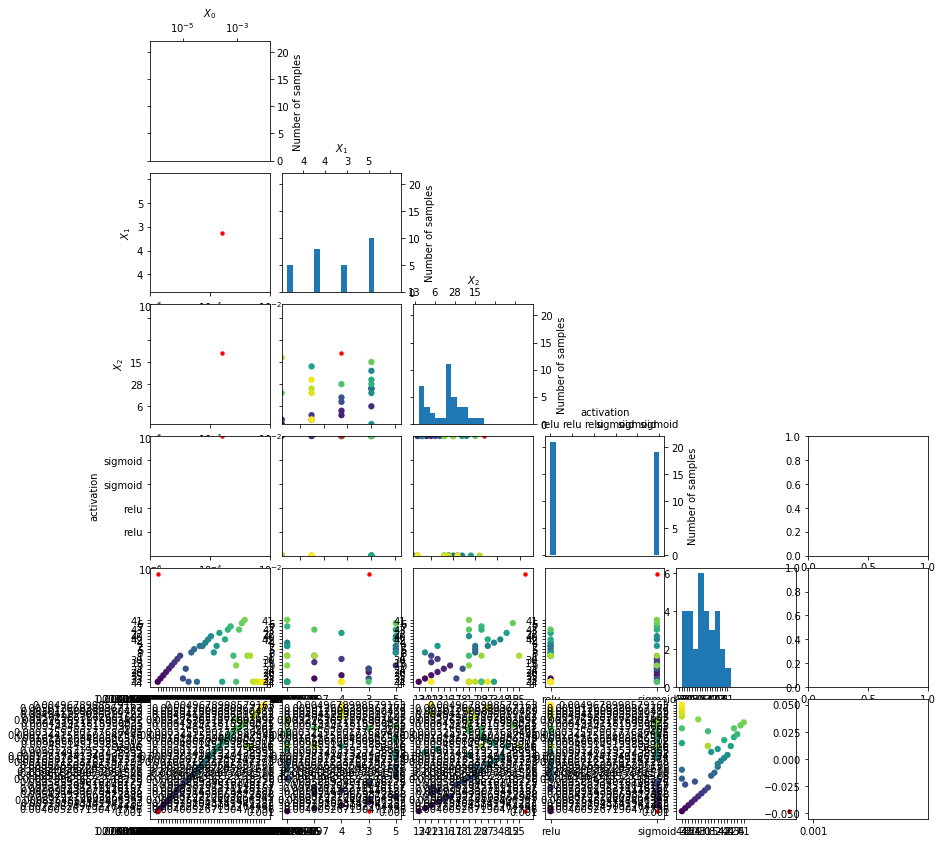

In [45]:
from skopt.plots import plot_objective,plot_evaluations

_ = plot_evaluations(gp_result)